In [1]:
# Mapping data from GLEA, 1993-2013

In [16]:
#packages
import geopandas
import numpy as np
import pandas as pd
import datetime
from shapely.geometry import Point
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cartopy.crs as ccrs
%matplotlib inline

In [23]:
#Get GEOJSON
greenland = geopandas.read_file("./Greenland_Shape.json")

# Set the projection to Azimuthal Equal Area (ESRI code: EPSG:3413)
# This is common for Greenland; adjust if needed
greenland_aea = greenland.to_crs("EPSG:3413")

#print(country.head())
#print(type(country.geometry[0]))
#country.plot(color='#DDDDDD', edgecolor='#000000', linewidth = 0.25)
# or country.boundary.plot(color='#666666')

In [4]:
quakeData = pd.read_csv('./GLEA_1993_2023_HC.tsv', sep='\t')
quakeData.info()
quakeData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hypocenter_type  1025 non-null   object 
 1   quality          1025 non-null   object 
 2   year             1025 non-null   int64  
 3   month            1025 non-null   int64  
 4   day              1025 non-null   int64  
 5   hour             1025 non-null   int64  
 6   minute           1025 non-null   int64  
 7   second           1025 non-null   float64
 8   latitude         1025 non-null   float64
 9   longitude        1025 non-null   float64
 10  depth            1025 non-null   float64
 11  magnitude_1      1025 non-null   float64
 12  magnitude_2      1025 non-null   float64
 13  region           1025 non-null   object 
 14  eventname        1025 non-null   object 
dtypes: float64(6), int64(5), object(4)
memory usage: 120.2+ KB


,hypocenter_type,quality,year,month,day,hour,minute,second,latitude,longitude,depth,magnitude_1,magnitude_2,region,eventname
0,SWEM,A,1993,1,24,10,21,4.0,68.50,-33.50,10.0,0.0,5.1,EASTERNGREENLAND,199301241021A
1,SWEM,B,1993,7,26,12,26,40.0,65.75,-41.25,10.0,0.0,4.9,WESTERNGREENLAND,199307261226A
2,SWEM,A,1993,8,5,2,0,40.0,68.75,-32.75,10.0,0.0,4.9,EASTERNGREENLAND,199308050200A
3,SWEM,C,1993,10,19,21,10,0.0,66.50,-37.50,10.0,0.0,4.8,EASTERNGREENLAND,199310192110A
4,SWEM,C,1993,11,30,7,33,52.0,67.50,-33.50,10.0,0.0,5.0,EASTERNGREENLAND,199311300733A


In [40]:
quakeData['coords'] = quakeData[['longitude', 'latitude']].values.tolist()  # Get coordinate values into a 2d list
quakeData['coords'] = quakeData['coords'].apply(Point)            # Convert coordinates into a point data type

# single date column accurate to day
quakeData['date'] = pd.to_datetime(quakeData[['year', 'month', 'day', 'hour', 'minute', 'second']])
quakeData['dateToOrdinal'] = quakeData['date'].map(pd.Timestamp.toordinal)
quakeData.set_index('date')
quakeData

quakeDataGeo = geopandas.GeoDataFrame(quakeData, geometry='coords')  # Convert dataset to geodataframe.GeoDataFrame, append 'coords' as geometry

quakeDataGeo = quakeDataGeo.set_crs("EPSG:4326")  # Set the original CRS if in lat/lon
quakeDataGeoAEA = quakeDataGeo.to_crs("EPSG:3413") # Reproject the points to EPSG:3413

quakeDataGeo.head(10)

,hypocenter_type,quality,year,month,day,hour,minute,second,latitude,longitude,depth,magnitude_1,magnitude_2,region,eventname,coords,date,dateToOrdinal
0,SWEM,A,1993,1,24,10,21,4.0,68.50,-33.50,10.0,0.0,5.1,EASTERNGREENLAND,199301241021A,POINT (-33.50000 68.50000),1993-01-24 10:21:04,727587
1,SWEM,B,1993,7,26,12,26,40.0,65.75,-41.25,10.0,0.0,4.9,WESTERNGREENLAND,199307261226A,POINT (-41.25000 65.75000),1993-07-26 12:26:40,727770
2,SWEM,A,1993,8,5,2,0,40.0,68.75,-32.75,10.0,0.0,4.9,EASTERNGREENLAND,199308050200A,POINT (-32.75000 68.75000),1993-08-05 02:00:40,727780
3,SWEM,C,1993,10,19,21,10,0.0,66.50,-37.50,10.0,0.0,4.8,EASTERNGREENLAND,199310192110A,POINT (-37.50000 66.50000),1993-10-19 21:10:00,727855
4,SWEM,C,1993,11,30,7,33,52.0,67.50,-33.50,10.0,0.0,5.0,EASTERNGREENLAND,199311300733A,POINT (-33.50000 67.50000),1993-11-30 07:33:52,727897
5,SWEM,B,1993,12,10,15,24,56.0,67.25,-34.25,10.0,0.0,5.0,EASTERNGREENLAND,199312101524A,POINT (-34.25000 67.25000),1993-12-10 15:24:56,727907
6,SWEM,B,1994,3,31,0,7,4.0,68.50,-33.50,10.0,0.0,4.8,EASTERNGREENLAND,199403310007A,POINT (-33.50000 68.50000),1994-03-31 00:07:04,728018
7,SWEM,C,1994,4,6,18,1,28.0,65.75,-41.25,10.0,0.0,4.8,WESTERNGREENLAND,199404061801A,POINT (-41.25000 65.75000),1994-04-06 18:01:28,728024
8,SWEM,C,1994,8,16,8,58,48.0,65.25,-40.75,10.0,0.0,4.7,WESTERNGREENLAND,199408160858A,POINT (-40.75000 65.25000),1994-08-16 08:58:48,728156
9,SWEM,A,1994,8,21,8,36,48.0,68.50,-33.50,10.0,0.0,5.0,EASTERNGREENLAND,199408210836A,POINT (-33.50000 68.50000),1994-08-21 08:36:48,728161


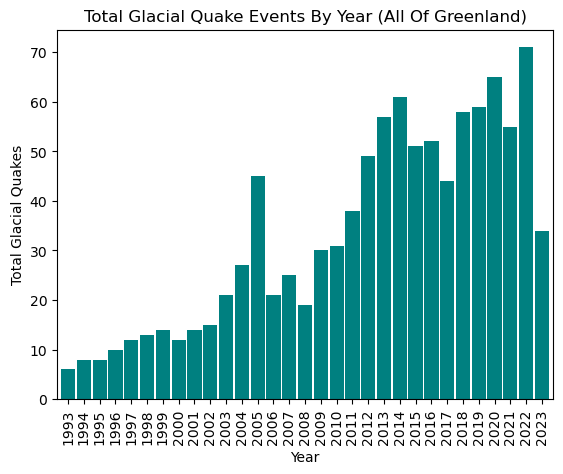

In [6]:
eventsAnnual = quakeDataGeo.groupby(quakeDataGeo.year).size()

#fig, ax = plt.subplots(figsize=(10,5))
#ax.bar(x, eventsAnnual, width=0.9, xlabel="Year", ylabel="Total Glacial Quakes", color="teal")
eventsAnnual.plot(kind='bar', title="Total Glacial Quake Events By Year (All Of Greenland)", width=0.9,  xlabel="Year", ylabel="Total Glacial Quakes", color="teal").set

plt.savefig('figures/GLEA-2023_AnnualTotals.png', bbox_inches='tight')

In [7]:
eventsRegion = quakeDataGeo.groupby(quakeDataGeo.region)
eventsRegion.size()

region
BAFFINBAY            40
EASTERNGREENLAND    391
WESTERNGREENLAND    594
dtype: int64

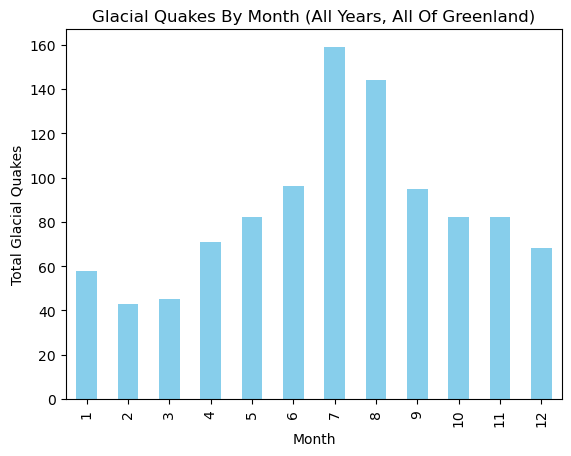

In [8]:
eventsMonthly = quakeDataGeo.groupby(quakeDataGeo.month).size()
eventsMonthly.plot(kind='bar', title="Glacial Quakes By Month (All Years, All Of Greenland)", xlabel="Month", ylabel="Total Glacial Quakes", color="skyblue")
plt.savefig('figures/GLEA-2023_MonthlyTotals.png', bbox_inches='tight')

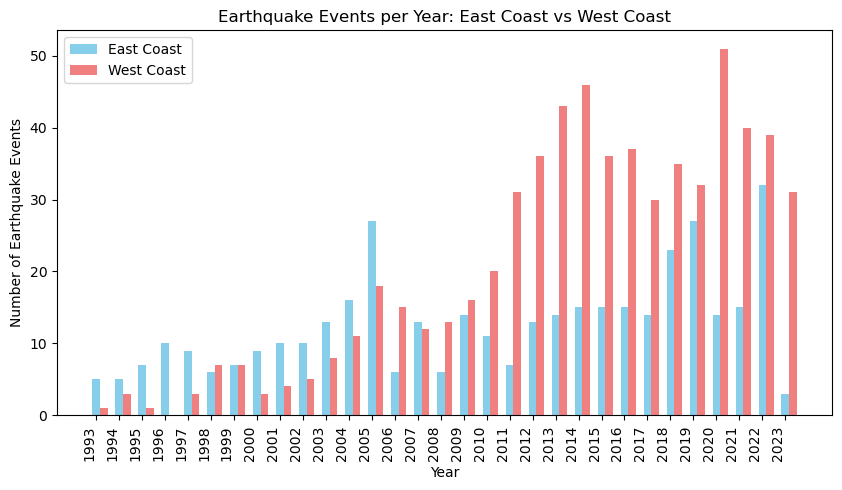

In [11]:
# plot by region and year, thanks GPT!!!!!!!!
grp_YearCoast = quakeDataGeo.groupby(['year', 'region']).size().unstack(fill_value=0)

bar_width = 1/3
years = grp_YearCoast.index
east_grp = grp_YearCoast['EASTERNGREENLAND']
west_grp = grp_YearCoast['WESTERNGREENLAND']
north_grp = grp_YearCoast['BAFFINBAY']
northwest_grp = pd.concat([west_grp, north_grp]).groupby('year').sum()

# The x locations for the groups
x = np.arange(len(years))

# Create the plot
fig, ax = plt.subplots(figsize=(10,5))

# Plot the East Coast bars
ax.bar(x, east_grp, bar_width, label='East Coast', color='skyblue')
# Plot the West Coast bars
ax.bar(x + bar_width, northwest_grp, bar_width, label='West Coast', color='lightcoral')
# Plot the West Coast bars
#ax.bar(x + bar_width*2, north_grp, bar_width, label='Baffin Bay', color='sandybrown')

# Add labels, title, and legend
ax.set_xlabel('Year')
ax.set_ylabel('Number of Earthquake Events')
ax.set_title('Earthquake Events per Year: East Coast vs West Coast')
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=90, ha='right')
ax.legend()
#plt.savefig('figures/GLEA-2023_Annual-EastWest.png', bbox_inches='tight')
#east_grp

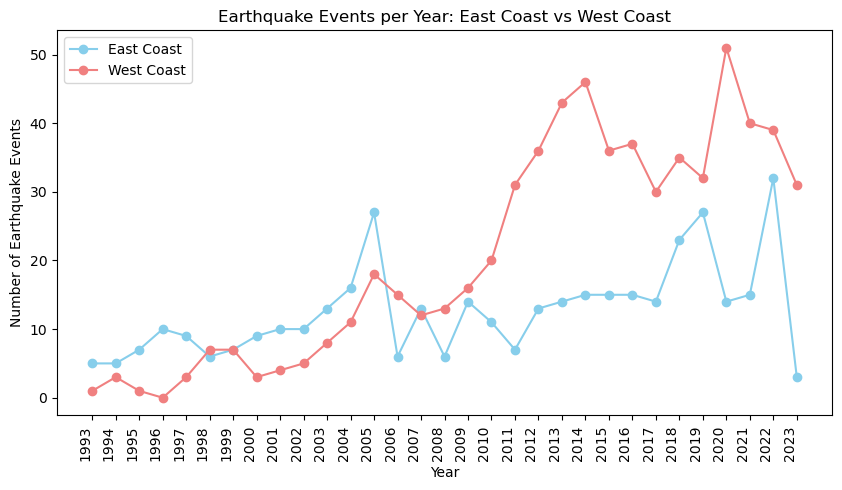

In [12]:
# plot by region and year, line
# Create the plot
fig, ax = plt.subplots(figsize=(10,5))

# Plot the East Coast bars
ax.plot(x, east_grp, marker="o", label='East Coast', color='skyblue')
ax.plot(x, northwest_grp, marker="o", label='West Coast', color='lightcoral')

# Add labels, title, and legend
ax.set_xlabel('Year')
ax.set_ylabel('Number of Earthquake Events')
ax.set_title('Earthquake Events per Year: East Coast vs West Coast')
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=90, ha='right')
ax.legend()
plt.savefig('figures/GLEA-2023_AnnualLine-2.png', bbox_inches='tight')

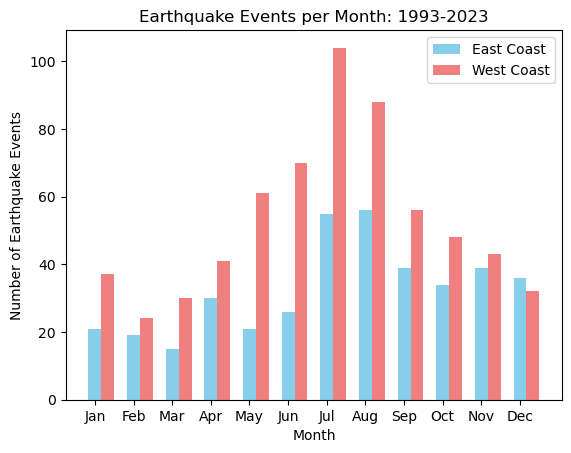

In [15]:
grp_YearCoast = quakeDataGeo.groupby(['month', 'region']).size().unstack(fill_value=0)

bar_width = 1/3
months = grp_YearCoast.index
east_grp = grp_YearCoast['EASTERNGREENLAND']
west_grp = grp_YearCoast['WESTERNGREENLAND']
north_grp = grp_YearCoast['BAFFINBAY']
northwest_grp = pd.concat([west_grp, north_grp]).groupby('month').sum()

# The x locations for the groups
x = np.arange(len(months))

# Create the plot
fig, ax = plt.subplots()

# Plot the East Coast bars
ax.bar(x, east_grp, bar_width, label='East Coast', color='skyblue')
# Plot the West Coast bars
ax.bar(x + bar_width, northwest_grp, bar_width, label='West Coast', color='lightcoral')


# Add labels, title, and legend
ax.set_xlabel('Month')
ax.set_ylabel('Number of Earthquake Events')
ax.set_title('Earthquake Events per Month: 1993-2023')
ax.set_xticks(x)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.legend()
plt.savefig('figures/GLEA-2023_MonthlybyCoast.png', bbox_inches='tight')

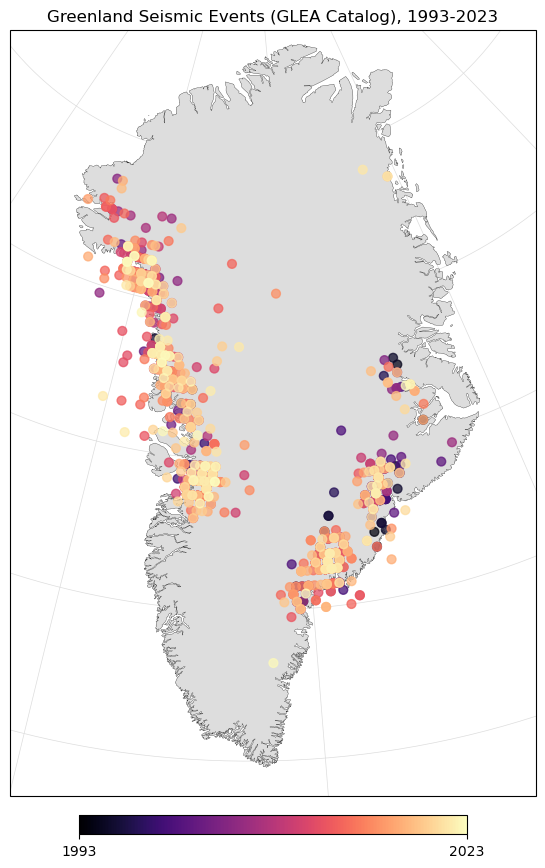

In [81]:
# Plot all events on map by age

fig, ax = plt.subplots(figsize=(10, 12), subplot_kw={'projection': ccrs.AzimuthalEquidistant(central_longitude=-45, central_latitude=72)})

# Add Greenland boundary to the plot
ax.add_geometries(greenland_aea.geometry, crs=ccrs.epsg(3413), edgecolor="black", linewidth = 0.2, facecolor="#DDDDDD", zorder=1)
# Set extent (optional, for focusing on Greenland)
ax.set_extent([-60, -27, 58, 84], crs=ccrs.PlateCarree())

# Add gridlines for reference
ax.gridlines(draw_labels=False, linewidth = 0.5, color='#DDDDDD', zorder=0)

#Colorization gradient
norm = plt.Normalize(vmin=quakeData['dateToOrdinal'].min(), vmax=quakeData['dateToOrdinal'].max())
colors = matplotlib.colormaps.get_cmap('magma')(norm(quakeData['dateToOrdinal']))

# Plot the points
ax.scatter(
    [point.x for point in quakeDataGeoAEA.geometry],
    [point.y for point in quakeDataGeoAEA.geometry],
    color=colors, 
    alpha=0.75,
    s=40, 
    transform=ccrs.epsg(3413), 
    label="Seismic Events by Age",
    zorder=2
)

# Color legend
sm = plt.cm.ScalarMappable(cmap='magma', norm=norm)
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.02, shrink=0.5)
#cbar.set_label("Age")
cbar.set_ticks([quakeData['dateToOrdinal'].min(), quakeData['dateToOrdinal'].max()])
cbar.set_ticklabels(['1993', '2023'])

#plt.legend(loc='lower right')
plt.title("Greenland Seismic Events (GLEA Catalog), 1993-2023", fontsize=12)

plt.savefig('figures/GLEA-2023_AEAMap_AllEvents.png', bbox_inches='tight')
plt.show()

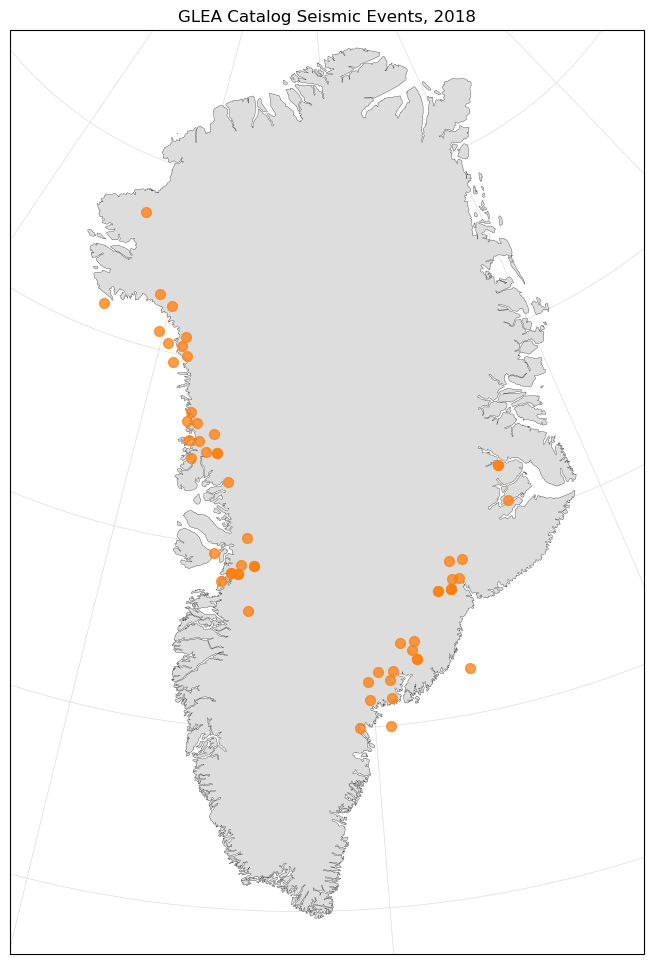

In [93]:
# Plot events on map for specific year
year = 2018
dataByYear = quakeDataGeoAEA[quakeDataGeoAEA['year'] == year]

fig, ax = plt.subplots(figsize=(10, 12), subplot_kw={'projection': ccrs.AzimuthalEquidistant(central_longitude=-45, central_latitude=72)})

# Add Greenland boundary to the plot
ax.add_geometries(greenland_aea.geometry, crs=ccrs.epsg(3413), edgecolor="black", linewidth = 0.2, facecolor="#DDDDDD", zorder=1)
# Set extent (optional, for focusing on Greenland)
ax.set_extent([-60, -27, 58, 84], crs=ccrs.PlateCarree())

# Add gridlines for reference
ax.gridlines(draw_labels=False, linewidth = 0.5, color='#DDDDDD', zorder=0)

# Plot the points
ax.scatter(
    [point.x for point in dataByYear.geometry],
    [point.y for point in dataByYear.geometry],
    color='tab:orange', 
    alpha=0.75,
    s=50, 
    transform=ccrs.epsg(3413), 
    zorder=2
)

# Add text labels for each point
#for x, y, label in zip(dataByYear.geometry.x, dataByYear.geometry.y, dataByYear['region']):
#    ax.annotate(label, (x, y), fontsize=8, textcoords="offset points", xytext=(5, -15), ha='center')


ax.set_title(f'GLEA Catalog Seismic Events, {year}', fontsize=12)
#plt.legend()

plt.savefig(f'figures/GLEA_AEAMap_Events{year}.png', bbox_inches='tight')
plt.show()




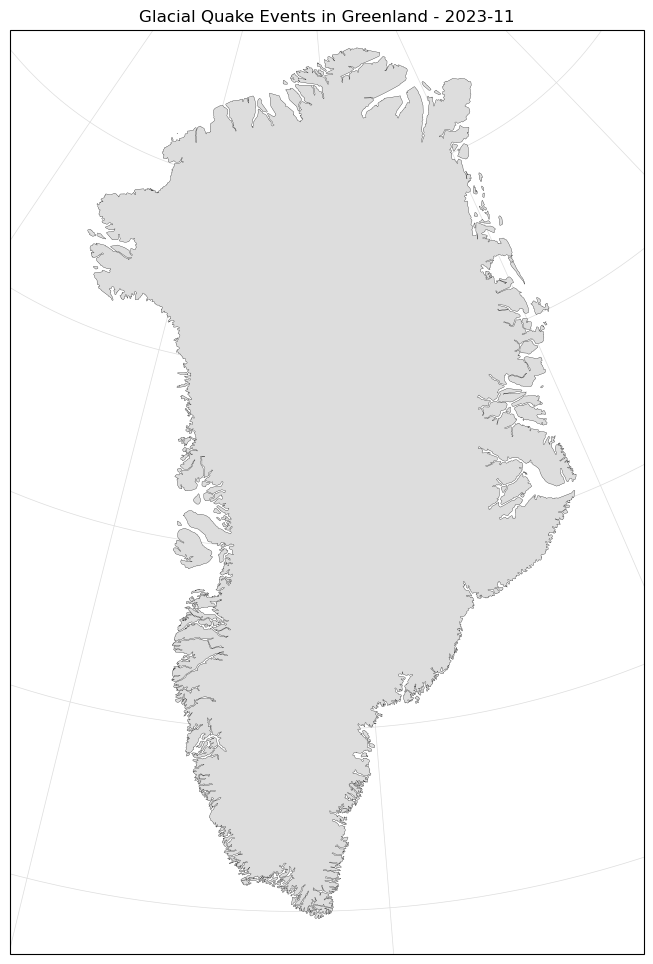

In [98]:
#Animated plot of all data

from matplotlib.animation import FuncAnimation

# Sort the data by time
data = quakeDataGeoAEA.sort_values(by='date')

'''
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 12))

country.plot(
    ax=ax,
    color='#DDDDDD', 
    edgecolor='#000000', 
    linewidth = 0.25
)

#ax.set_xlim(-70, -20)
#ax.set_ylim(59, 80)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Glacial Quake Events Over Time in Greenland')

# Initialize scatter plot
#scat = ax.scatter([], [], s=100, color=colors, alpha=1.0)

scat = ax.scatter(
    quakeDataGeo.geometry.x, 
    quakeDataGeo.geometry.y, 
    s=100,
    color=colors,
    alpha=0.35, 
    label='All Events'
)
'''

fig, ax = plt.subplots(figsize=(10, 12), subplot_kw={'projection': ccrs.AzimuthalEquidistant(central_longitude=-45, central_latitude=72)})

# Add Greenland boundary to the plot
ax.add_geometries(greenland_aea.geometry, crs=ccrs.epsg(3413), edgecolor="black", linewidth = 0.2, facecolor="#DDDDDD", zorder=1)
# Set extent (optional, for focusing on Greenland)
ax.set_extent([-60, -27, 58, 84], crs=ccrs.PlateCarree())

# Add gridlines for reference
ax.gridlines(draw_labels=False, linewidth = 0.5, color='#DDDDDD', zorder=0)

# Plot the points
geoScatter = ax.scatter(
    quakeDataGeo.geometry.x, 
    quakeDataGeo.geometry.y,
    alpha=0.75,
    s=50, 
    transform=ccrs.epsg(3413), 
    zorder=2
)

def update(frame):
    # Filter data up to the current frame
    current_data = data[data['date'] <= frame]
    
    # Update scatter plot with current data
    geoScatter.set_offsets(np.c_[current_data.geometry.x, current_data.geometry.x])
    ax.set_title(f'Glacial Quake Events in Greenland - {frame.year}-{frame.month:02d}')
    return geoScatter,

# Set up the animation
ani = FuncAnimation(
    fig, 
    update, 
    frames=pd.date_range(start='1993-01-01', end=data['date'].max(), freq='ME'), 
    blit=True,
    repeat=False
)

ani.save('GLEA_1993-2023-Anim_2.gif', writer='pillow', fps=15)       # Save as GIF

plt.show()